# GROUP 8, Project 3

### STOCK ANALYSIS AND PREDICTIONS

### 1. Use Generative AI to evaluate sentiment for a stock (LLM, LangChain Agents/Tools)
### 2. Train and use a LSTM RNN model to predict a stock price
### 3. Use VADER to get a sentiment on news headlines


In [1]:
"""
Load the keys

"""
import os
from dotenv import load_dotenv

# Load environment variables.
load_dotenv()

"""
For reference:
set in .env file in same dir as code
key=value with no quotes
. ./.env
"""

# Set the model name for our LLMs.
GEMINI_MODEL = "gemini-1.5-flash"


# Get the keys from the environment; changed code to push to Github
GEMINI_API_KEY = ""
ALPHAVANTAGE_API_KEY = ""
SERPAPI_API_KEY = ""
OPENAI_API_KEY = ""
SEARCHAPI_API_KEY = ""
TAVILY_API_KEY= ""

## Section 1: Use Chat Generative API and conversational agents/tools to like into financial instruments

In [2]:
"""
Import libraries
"""

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import tool, BaseTool
from langchain.agents import AgentType, initialize_agent, Tool, load_tools
from langchain.memory import ConversationBufferWindowMemory
from langchain_community.utilities.alpha_vantage import AlphaVantageAPIWrapper
from langchain.tools import Tool
from langchain_community.tools.google_finance import GoogleFinanceQueryRun
from langchain_community.utilities.google_finance import GoogleFinanceAPIWrapper
from langchain_community.tools.yahoo_finance_news import YahooFinanceNewsTool


import yfinance as yf

llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)



USER_AGENT environment variable not set, consider setting it to identify your requests.
/Users/srilathasathya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
"""
Define function for My Yahoo News Tool
"""
def my_yahoo_news(input=""):
        stock = yf.Ticker(input.upper())
        news = stock.news
        return news


In [4]:
"""
Define My Yahoo News Tool
"""

my_yahoo_news_tool = Tool(
    name="My Yahoo News Tool",
    func=lambda query: my_yahoo_news(input=query),
    description="Use this function to get news of a stock or crypto currency. Remove the dollar prefix sign before you get the price"
)


In [5]:
"""
Get a conversational Buffer going
"""

memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=6,
    return_messages=True
)

/var/folders/8s/gb2wyk0x7sx4b5tvrfblj1h80000gn/T/ipykernel_51674/3567143149.py:5: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(


In [6]:
"""
Define function for Alpha Vantage Tool
"""

# Custom tool for Alpha Vantage News Sentiment
def create_alpha_vantage_tool(alphavantage_api_key=ALPHAVANTAGE_API_KEY):
    av = AlphaVantageAPIWrapper(alphavantage_api_key=ALPHAVANTAGE_API_KEY)
    return Tool(
        name="AlphaVantage Stock Data",
        func=lambda query: av._get_market_news_sentiment(symbol=query),
        description="News Sentiment for Symbol."
    )

# Example usage

"""
Define Alpha Vantage Tool
"""

alpha_tool = create_alpha_vantage_tool(ALPHAVANTAGE_API_KEY)

In [7]:

"""
Define Google Finance Tool
"""

GoogleFinanceTool = GoogleFinanceQueryRun(api_wrapper=GoogleFinanceAPIWrapper())

## Agent to peek into sources: Yahoo Finance News, AlphaVantage News Sentiment and Google Stock Prices

In [8]:
"""
Get the conversational agent to peek into the 3 sources fed in as tools to the Langchain:
    Yahoo Finance News
    Alpha Vantage
    Google Stock Prices

"""


from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import AgentType, initialize_agent, Tool, load_tools
from langchain_community.tools.yahoo_finance_news import YahooFinanceNewsTool


llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)


tools = [my_yahoo_news_tool, alpha_tool, GoogleFinanceTool]

conversational_agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    max_iterations=6,
    memory=memory
)





/var/folders/8s/gb2wyk0x7sx4b5tvrfblj1h80000gn/T/ipykernel_51674/2699403783.py:20: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use :meth:`~Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc.` instead.
  conversational_agent = initialize_agent(


In [9]:
"""
Feed in query: Should I buy Amazon Stock?

"""


conversational_agent.run("Should I buy Amazon stock")


/var/folders/8s/gb2wyk0x7sx4b5tvrfblj1h80000gn/T/ipykernel_51674/4194065190.py:7: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  conversational_agent.run("Should I buy Amazon stock")




> Entering new AgentExecutor chain...
Thought: To determine whether to buy Amazon stock, I need to consider its current market performance, news sentiment, and overall financial health.  I'll start by checking its current price and recent news.

Action: My Yahoo News Tool
Action Input: Amazon

Observation: [{'uuid': 'c44aabbc-0dc2-38c9-9db8-0f6e1e98e5cf', 'title': 'AWS Announces New Data Center Components to Support AI Innovation and Further Improve Energy Efficiency', 'publisher': 'Business Wire', 'link': 'https://finance.yahoo.com/news/aws-announces-data-center-components-203000987.html', 'providerPublishTime': 1733178720, 'type': 'STORY', 'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/EhY4TCvD1bTKXHLDottPqQ--~B/aD01MTI7dz0xMDI0O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/business-wire.com/d23a466708aa1b4642d96d10e19675cf', 'width': 1024, 'height': 512, 'tag': 'original'}, {'url': 'https://s.yimg.com/uu/api/res/1.2/_ODs1V.ttcrL_KfOk1fpDA--~B/Zmk9ZmlsbDt

Thought:Thought:The AlphaVantage data provides a mixed sentiment, with some news articles showing somewhat bullish and others neutral sentiment.  To make a fully informed decision, I need the current Amazon stock price.

Action: google_finance
Action Input: AMZN

Observation: 
Query: AMZN

stock: AMZN:NASDAQ
price: $210.71
percentage: 1.36
movement: Up
us: price = 44782.0, movement = Down
europe: price = 19933.62, movement = Up
asia: price = 38513.02, movement = Up

Thought:Thought:I now have the current Amazon stock price ($210.71) and a mixed sentiment analysis from AlphaVantage. The news from Yahoo Finance shows positive developments, particularly around AWS and AI initiatives.  While the sentiment is mixed, the positive news and price movement suggest a potentially favorable outlook. However, this is not financial advice, and individual circumstances should be considered.

Final Answer: Based on the current market price of $210.71 and recent news indicating positive developments in

"Based on the current market price of $210.71 and recent news indicating positive developments in Amazon's AI and AWS sectors, along with a somewhat bullish overall sentiment, the outlook for Amazon stock appears moderately positive.  However, this is not financial advice, and the decision to buy Amazon stock should be based on your own risk tolerance, investment strategy, and financial goals.  Consult a financial advisor before making any investment decisions."

In [10]:
"""
Feed in query: Tell me about its competitors

"""

conversational_agent.run("Tell me about its competitors")




> Entering new AgentExecutor chain...
Question: Tell me about its competitors
Thought: I need to know what "its" refers to.  The question is incomplete. I need a company or product name to find its competitors.
Final Answer: I need more information. Please specify the company or product you are asking about.


> Finished chain.


'I need more information. Please specify the company or product you are asking about.'

In [11]:
"""
Feed in query: Tell me about competitors of Amazon

"""


conversational_agent.run("Tell me about competitors of Amazon")



> Entering new AgentExecutor chain...
Thought: To answer this question, I need to find companies that compete with Amazon in various sectors.  Amazon operates in e-commerce, cloud computing, digital streaming, and more. I'll use Google Finance to get a broad overview of major competitors in different areas.

Action: google_finance
Action Input: Amazon competitors

Observation: 
Query: Amazon competitors

No summary information
us: price = 44782.0, movement = Down
europe: price = 19933.62, movement = Up
asia: price = 38513.02, movement = Up

Thought:Question: Tell me about competitors of Amazon
Thought:To answer this question, I need to find companies that compete with Amazon in various sectors.  Amazon operates in e-commerce, cloud computing, digital streaming, and more. I'll use Google Finance to get a broad overview of major competitors in different areas, then refine my search with more specific queries.

Action: google_finance
Action Input: Amazon competitors

Observation: 
Query

"Amazon's main competitors vary depending on the market segment.  In e-commerce, major competitors include Walmart, Target, eBay, and Shopify.  In cloud computing, the primary competitors are Microsoft (Azure), Google Cloud Platform (GCP), and Alibaba Cloud.  In digital streaming, Netflix, Disney+, and Hulu are key competitors.  In other areas like grocery delivery, Amazon faces competition from Instacart and Kroger.  This is not an exhaustive list, and the competitive landscape is constantly evolving."

In [12]:
"""
Feed in query: Tell me about Crypto. Should I invest in it?

"""


conversational_agent.run("Tell me about Crypto. Should I invest in it?")



> Entering new AgentExecutor chain...
Thought: I need to gather information about the current state of the crypto market to answer the question.  I'll start by looking at overall news sentiment using AlphaVantage.  Then I'll check Yahoo Finance for recent news to get a broader picture.  Finally, I'll use Google Finance to see some general information and maybe get a sense of overall market capitalization.  This will give me a more comprehensive view before offering advice on investment.

Action: AlphaVantage Stock Data
Action Input: BTC (Bitcoin), ETH (Ethereum) -  I'll check the sentiment for Bitcoin and Ethereum, two major cryptocurrencies.

Observation: {'items': '50', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': [{'title': 'JPMorgan Asset Management  ( 

Thought:Thought:The AlphaVantage data provides a mixed sentiment. While some tickers show bullish sentiment, many are neutral.  This doesn't give a clear picture of the crypto market itself. I'll now use the Yahoo News tool to get recent news on Bitcoin and Ethereum to see if there are any major events impacting their price or sentiment.

Action: My Yahoo News Tool
Action Input: BTC, ETH

Observation: [{'uuid': 'ded7256b-4023-32f7-95b5-e5c333de7783', 'title': 'November gains, bitcoin ETF inflows, Black Friday: 3 Things', 'publisher': 'Yahoo Finance Video', 'link': 'https://finance.yahoo.com/video/november-gains-bitcoin-etf-inflows-141853893.html', 'providerPublishTime': 1732889933, 'type': 'VIDEO', 'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/KKGkLC69.5Wg9zes3MW2SQ--~B/aD0yMjY0O3c9NDAzMjthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2024-11/7f9721d0-ae5c-11ef-8fdb-5a805ee2dce9', 'width': 4032, 'height': 2264, 'tag': 'original'}, {'url': 


Observation: 
Query: Bitcoin, Ethereum

No summary information
us: price = 44782.0, movement = Down
europe: price = 19933.62, movement = Up
asia: price = 38513.02, movement = Up

Thought:Thought:I now have a fairly comprehensive overview.  AlphaVantage showed mixed sentiment, Yahoo Finance news indicated recent price volatility driven by specific events, and Google Finance provided current price information across different regions.  While some news is positive, the overall picture is one of significant volatility and uncertainty.  Therefore, I cannot recommend whether or not to invest.

Final Answer: Based on the available data, the cryptocurrency market, specifically Bitcoin and Ethereum, shows mixed sentiment and considerable price volatility.  Recent news suggests factors such as the SEC chair's departure and ETF speculation are influencing prices.  Given this uncertainty, I cannot recommend whether or not you should invest in cryptocurrencies.  Investing in crypto carries signifi

"Based on the available data, the cryptocurrency market, specifically Bitcoin and Ethereum, shows mixed sentiment and considerable price volatility.  Recent news suggests factors such as the SEC chair's departure and ETF speculation are influencing prices.  Given this uncertainty, I cannot recommend whether or not you should invest in cryptocurrencies.  Investing in crypto carries significant risk, and you should conduct thorough research and consult with a financial advisor before making any investment decisions."

In [13]:
"""
Feed in query: Should I buy Nvidia?

"""


conversational_agent.run("Should I buy Nvidia?")



> Entering new AgentExecutor chain...
Thought: To determine whether to buy Nvidia, I need to analyze its current market performance, news sentiment, and overall financial health.  I'll start by checking recent news and then assess sentiment.

Action: My Yahoo News Tool
Action Input: NVDA

Observation: [{'uuid': 'c7fc3792-42be-3421-ad4b-02a41a5de6e0', 'title': 'Alpha & Omega Semiconductor Stock Scores Relative Strength Rating Upgrade', 'publisher': "Investor's Business Daily", 'link': 'https://finance.yahoo.com/m/c7fc3792-42be-3421-ad4b-02a41a5de6e0/alpha-%26-omega-semiconductor.html', 'providerPublishTime': 1733178840, 'type': 'STORY', 'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/CV9O53fka7aSG3Lpv1LaCQ--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/34cca67fae26bc0f236698386833518e', 'width': 1000, 'height': 563, 'tag': 'original'}, {'url': 'https://s.yimg.com/uu/api/res/1.2/VCbf8TE4edJ63Xauo_uFmA--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0

Thought:Thought:AlphaVantage's sentiment analysis shows a mixed bag of news, with some bullish and some bearish sentiment.  However, there's no direct sentiment score for NVDA itself in this batch of news.  The overall sentiment is slightly positive, but this is not conclusive enough to make an investment decision. I need more information, specifically, the current price and recent performance of Nvidia.

Action: google_finance
Action Input: NVDA

Observation: 
Query: NVDA

stock: NVDA:NASDAQ
price: $138.63
percentage: 0.27
movement: Up
us: price = 44782.0, movement = Down
europe: price = 19933.62, movement = Up
asia: price = 38513.02, movement = Up

Thought:Thought:I now have the current price of NVDA from Google Finance ($138.63) and its recent movement (up 0.27%).  Combining this with the mixed but slightly positive sentiment from AlphaVantage, I can offer a more informed response.  However, this is still not a recommendation to buy or sell, as individual investment decisions should

'Based on the available data, Nvidia (NVDA) shows a slightly positive news sentiment and a recent price increase. However, this information alone is insufficient to definitively recommend buying the stock.  A comprehensive investment decision requires further analysis of financial statements, future projections, and consideration of your personal risk tolerance and investment goals.  Consult a financial advisor before making any investment decisions.'

## Section 2: Build and train LSTM model to predict stock prices

In [14]:
"""

MODULE 3:

Description:

WHAT: Predict closing stock price based on past 60 day closing prices

HOW: Using Recurrent Neural Network - Long Short Term Memory (LSTM) model

"""

#Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [15]:
#Stocker Ticker for modeling
#stock_of_interest = 'NVDA'
stock_of_interest = input("Enter stock ticker of interest")
print(f"stock of interest {stock_of_interest}")

Enter stock ticker of interestNVDA
stock of interest NVDA


In [16]:
#Use YAHOO FINANCE to get historical data (2020 - 2024)

import yfinance as yf

stock_data = yf.download(stock_of_interest, start='2020-01-01', end='2024-11-30')
df = stock_data

[*********************100%***********************]  1 of 1 completed


In [17]:
# Get the number of rows and cols
print(f"data count: {stock_data.shape[0]} features: {stock_data.shape[1]}")

data count: 1237 features: 6


In [18]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2020-01-02,5.973122,5.997750,5.997750,5.918000,5.968750,237536000
2020-01-03,5.877517,5.901750,5.945750,5.852500,5.877500,205384000
2020-01-06,5.902164,5.926500,5.931750,5.781750,5.808000,262636000
2020-01-07,5.973619,5.998250,6.044250,5.909750,5.955000,314856000
2020-01-08,5.984823,6.009500,6.051000,5.953750,5.994000,277108000
...,...,...,...,...,...,...
2024-11-22,141.949997,141.949997,147.160004,141.100006,145.929993,236406200
2024-11-25,136.020004,136.020004,142.050003,135.820007,141.990005,344941900


In [19]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2020-01-02 to 2024-11-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  1237 non-null   float64
 1   (Close, NVDA)      1237 non-null   float64
 2   (High, NVDA)       1237 non-null   float64
 3   (Low, NVDA)        1237 non-null   float64
 4   (Open, NVDA)       1237 non-null   float64
 5   (Volume, NVDA)     1237 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.6 KB


In [20]:
#Rename columns for convenience
stock_data.columns=["Adj Close","Close","High","Low","Open","Volume"]

In [21]:
stock_data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,5.973122,5.997750,5.997750,5.918000,5.968750,237536000
2020-01-03,5.877517,5.901750,5.945750,5.852500,5.877500,205384000
2020-01-06,5.902164,5.926500,5.931750,5.781750,5.808000,262636000
2020-01-07,5.973619,5.998250,6.044250,5.909750,5.955000,314856000
2020-01-08,5.984823,6.009500,6.051000,5.953750,5.994000,277108000
...,...,...,...,...,...,...
2024-11-22,141.949997,141.949997,147.160004,141.100006,145.929993,236406200
2024-11-25,136.020004,136.020004,142.050003,135.820007,141.990005,344941900
2024-11-26,136.919998,136.919998,139.300003,135.669998,137.699997,190287700


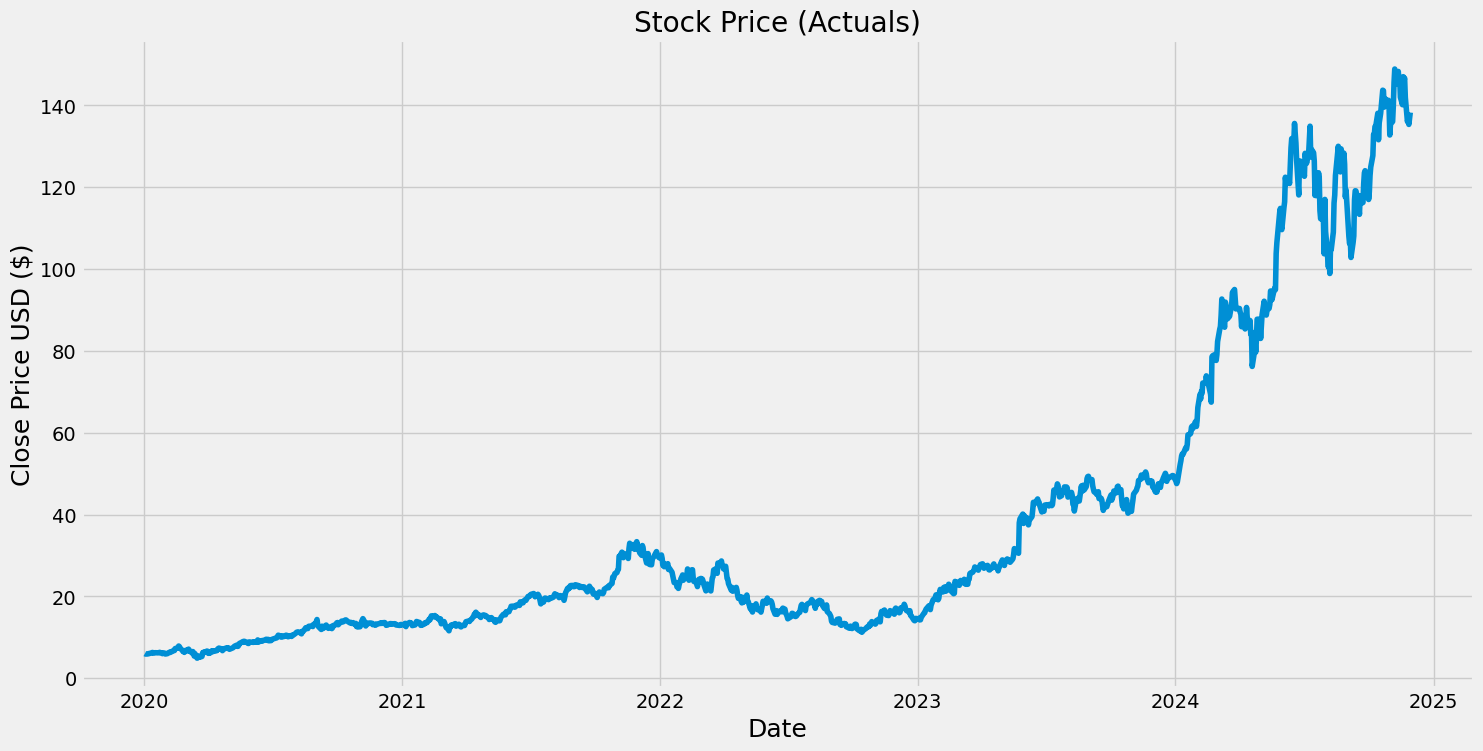

In [22]:
"""
Visualize the closing prices
"""
plt.figure(figsize=(16,8))
plt.title('Stock Price (Actuals)')
plt.plot(stock_data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [23]:
#Create a new data frame with only Close prices
#data = stock_data(['Close'])
#Convert to numpy array

#dataset = data.values
# no of rows to train model on
data = stock_data[['Close']]
training_data_len=math.ceil(len(data) * 0.8)
print(f"length of original data set: {len(data)}")
print(f"length of training data: {training_data_len}")


length of original data set: 1237
length of training data: 990


In [24]:
data

,Close
Date,
2020-01-02,5.997750
2020-01-03,5.901750
2020-01-06,5.926500
2020-01-07,5.998250
2020-01-08,6.009500
...,...
2024-11-22,141.949997
2024-11-25,136.020004
2024-11-26,136.919998


In [25]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.00755539],
       [0.00688859],
       [0.0070605 ],
       ...,
       [0.91692709],
       [0.90595257],
       [0.92616514]])

In [26]:
## Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]
#split into xtrain and ytrain
X_train=[]
y_train=[]

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60 :i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(X_train)
        print(y_train)
        print()

[array([0.00755539, 0.00688859, 0.0070605 , 0.00755887, 0.00763701,
       0.00809544, 0.00832118, 0.00965132, 0.00883518, 0.00853824,
       0.00912169, 0.00918247, 0.00894978, 0.0093266 , 0.00980413,
       0.00939085, 0.00760575, 0.00895499, 0.00853303, 0.00857991,
       0.0069511 , 0.00762833, 0.00880913, 0.00943947, 0.01004549,
       0.0095836 , 0.0115597 , 0.01241404, 0.0132215 , 0.01291588,
       0.01621692, 0.01739425, 0.02054247, 0.01950059, 0.01696013,
       0.01335   , 0.01139994, 0.01237237, 0.00975898, 0.0127926 ,
       0.01389699, 0.01206675, 0.01530006, 0.01335174, 0.0120928 ,
       0.00851566, 0.01123151, 0.00869452, 0.00345732, 0.00771689,
       0.        , 0.00362402, 0.00111482, 0.00287734, 0.0016236 ,
       0.00282871, 0.0091651 , 0.00854692, 0.0105647 , 0.00978155])]
[0.012014656497214574]



In [27]:
### Convert the x_train and y_train to n arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
len(X_train)

930

In [29]:
data.iloc[930,:]

Close    45.485001
Name: 2023-09-13 00:00:00, dtype: float64

In [30]:
X_train

array([[0.00755539, 0.00688859, 0.0070605 , ..., 0.00854692, 0.0105647 ,
        0.00978155],
       [0.00688859, 0.0070605 , 0.00755887, ..., 0.0105647 , 0.00978155,
        0.01201466],
       [0.0070605 , 0.00755887, 0.00763701, ..., 0.00978155, 0.01201466,
        0.0116691 ],
       ...,
       [0.28243382, 0.27969716, 0.27755781, ..., 0.30027088, 0.29075501,
        0.29072028],
       [0.27969716, 0.27755781, 0.28182954, ..., 0.29075501, 0.29072028,
        0.28200317],
       [0.27755781, 0.28182954, 0.28249635, ..., 0.29072028, 0.28200317,
        0.28933806]])

In [31]:
#Reshape the inputs for LSTM model; No of samples, no of timestamps, no of features
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [32]:
X_train.shape

(930, 60, 1)

In [33]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

/Users/srilathasathya/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
#compile the model
#Optimizer improves on the loss function
#loss function measures how well the model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
#train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0013
Epoch 2/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 2.8108e-04
Epoch 3/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.9945e-04
Epoch 4/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.6983e-04
Epoch 5/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.3283e-04
Epoch 6/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.9541e-04
Epoch 7/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.9933e-05
Epoch 8/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.6836e-04
Epoch 9/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 6.1383e-05
Epoch 10/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.2150e-04


In [36]:
training_data_len

990

In [37]:
#Create the test data set
test_data = scaled_data[training_data_len - 60: , : ]
X_test = []
y_test = scaled_data[training_data_len:,:]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60: i,0])

In [38]:
test_data.shape

(307, 1)

In [39]:
len(test_data)

307

In [40]:
y_test

array([[0.28954643],
       [0.29586719],
       [0.28976174],
       [0.29691603],
       [0.2999097 ],
       [0.30172951],
       [0.30548029],
       [0.31372507],
       [0.31043967],
       [0.30006945],
       [0.3061749 ],
       [0.30506356],
       [0.30818225],
       [0.30914078],
       [0.3098701 ],
       [0.3098701 ],
       [0.30046536],
       [0.29630478],
       [0.29928457],
       [0.3069181 ],
       [0.32883932],
       [0.33500033],
       [0.34340485],
       [0.34668332],
       [0.34590538],
       [0.35751892],
       [0.35523373],
       [0.36255468],
       [0.3791137 ],
       [0.38024587],
       [0.38176703],
       [0.39210945],
       [0.39388066],
       [0.38981035],
       [0.39977077],
       [0.40191704],
       [0.39325553],
       [0.40367437],
       [0.42543587],
       [0.44746821],
       [0.43976521],
       [0.4527957 ],
       [0.44961448],
       [0.46692367],
       [0.46772243],
       [0.46688891],
       [0.47919705],
       [0.470

In [42]:
#convert the data to np array
X_test = np.array(X_test)

In [43]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [44]:
### Predict prices using the LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [45]:
predictions

array([[ 47.347927],
       [ 48.891846],
       [ 49.779762],
       [ 48.6592  ],
       [ 50.024956],
       [ 50.343994],
       [ 50.64682 ],
       [ 51.23763 ],
       [ 52.588936],
       [ 51.821342],
       [ 50.09223 ],
       [ 51.33482 ],
       [ 50.96248 ],
       [ 51.598927],
       [ 51.664165],
       [ 51.792057],
       [ 51.764946],
       [ 50.121742],
       [ 49.609047],
       [ 50.180336],
       [ 51.475445],
       [ 55.20201 ],
       [ 55.810623],
       [ 57.21412 ],
       [ 57.503815],
       [ 57.274082],
       [ 59.33566 ],
       [ 58.5688  ],
       [ 59.99444 ],
       [ 62.703896],
       [ 62.452927],
       [ 62.72331 ],
       [ 64.48215 ],
       [ 64.47156 ],
       [ 63.702885],
       [ 65.618904],
       [ 65.65601 ],
       [ 64.065506],
       [ 66.236015],
       [ 69.86778 ],
       [ 73.33112 ],
       [ 71.11942 ],
       [ 73.86504 ],
       [ 72.57687 ],
       [ 76.08396 ],
       [ 75.41647 ],
       [ 75.34747 ],
       [ 77.6

In [46]:
len(predictions)

247

In [47]:
model.evaluate(y_test, predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 7913.2783


11398.9296875

In [48]:
#evaluate the model using root mean squared error - std devn of residuals - low is better
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

102.9851390596826

In [49]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions

/var/folders/8s/gb2wyk0x7sx4b5tvrfblj1h80000gn/T/ipykernel_51674/2496906409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


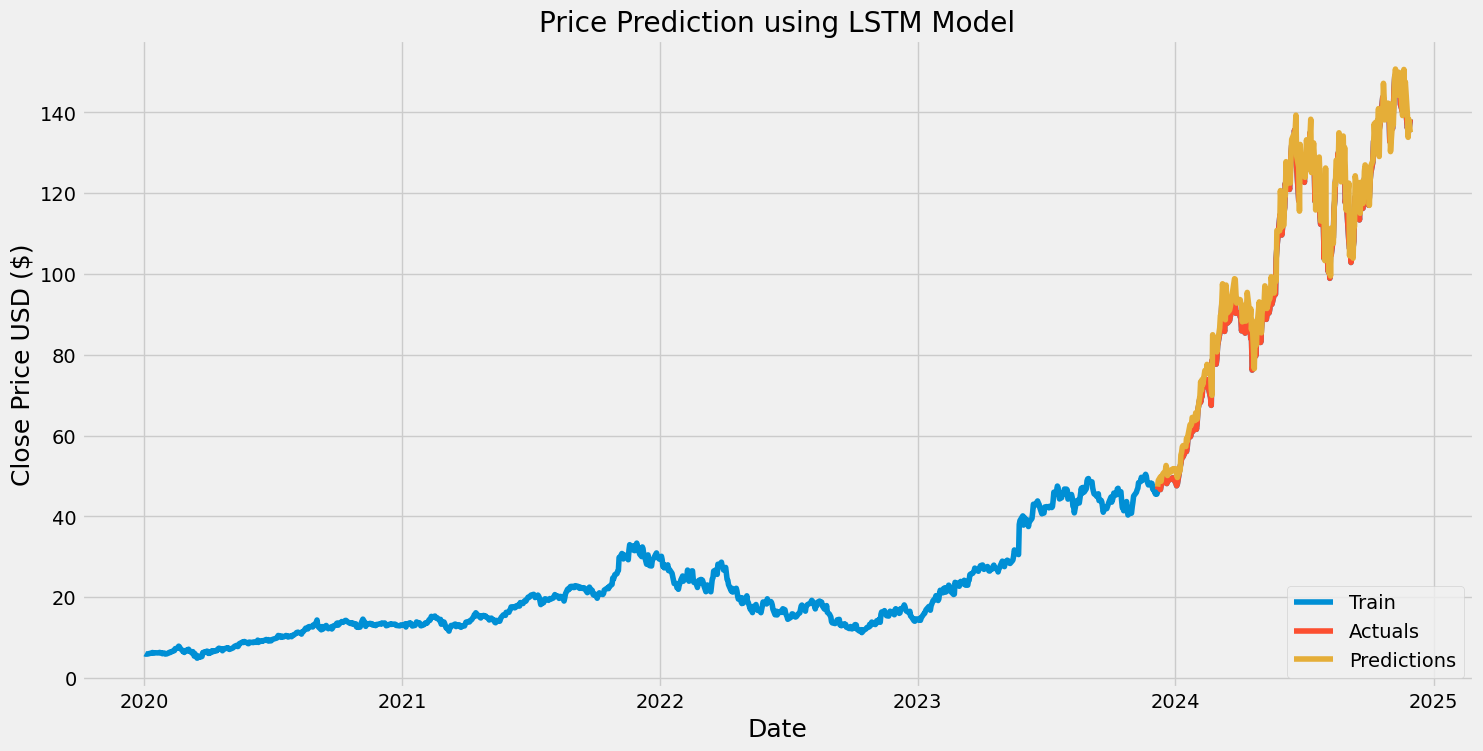

In [50]:
#Visualize the results
plt.figure(figsize=(16,8))
plt.title('Price Prediction using LSTM Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(('Train','Actuals','Predictions'),loc='lower right')
plt.show()

In [51]:
"""
Show the Actual and Predicted prices
"""
valid.tail(20)

,Close,Predictions
Date,,
2024-11-01,135.399994,130.271790
2024-11-04,136.050003,138.025848
2024-11-05,139.910004,136.848679
2024-11-06,145.610001,143.007874
2024-11-07,148.880005,148.946854
2024-11-08,147.630005,150.708664
2024-11-11,145.259995,147.000626
2024-11-12,148.289993,144.210938
2024-11-13,146.270004,149.887375


## Section 3: Use VADER to get a sentiment on news headlines

In [52]:
#installs

!pip install finvizfinance

In [53]:
!pip install nltk

In [54]:
import gradio as gr
import pandas as pd
from finvizfinance.quote import finvizfinance
import numpy as np


In [55]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srilathasathya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
"""
Import VADER"""

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


In [57]:
"""
Extract sentiment score from results
"""

def extract_score(text):
    score = sid.polarity_scores(text)
    compound = score['compound']
    
    sentiment = 'neutral'
    if(compound >= 0.05):
        sentiment = "positive"
    elif(compound <= -0.05):
        sentiment = "negative"
    return sentiment

In [58]:
"""
Source data from Finviz Finance and extract the sentiment scores using VADER
"""

def process_ticker(ticker):
    ticker = ticker.upper()
    stock = finvizfinance(ticker)
    news_df = stock.ticker_news()

    # Add predicted sentiment column
    news_df["Predicted Sentiment"] = news_df["Title"].apply(extract_score)
    
    # Generate a synopsis summary of sentiment
    sentiment_counts = news_df["Predicted Sentiment"].value_counts()
    synopsis = sentiment_counts.to_string()  
    
    return news_df[["Title", "Predicted Sentiment"]], synopsis  

In [59]:
# Function to clear all outputs
def clear_data():
    # Return empty inputs and an empty DataFrame with correct headers
     return "", pd.DataFrame(columns=["Headline", "Predicted Sentiment"]), ""


In [60]:
"""
Use the Gradio interface to input Stock ticker and display the headline news and sentiment
"""

# Gradio Interface
with gr.Blocks(theme=gr.themes.Glass(primary_hue="blue")) as app:
    gr.Markdown("# 📈 Headline News Sentiment Analyzer")
    gr.Markdown(
        """
        Analyze the sentiment of recent news headlines for a given stock ticker.
        Just enter a valid ticker symbol (e.g., `AAPL`, `GOOGL`, `TSLA`) to see the predicted sentiment of recent news articles.
        """
    )
    with gr.Row():
        ticker_input = gr.Textbox(
            label="**Enter Stock Ticker**",  # Bold label for clarity
            placeholder="e.g., AAPL",
            lines=1,
        )
    
    with gr.Row():
        analyze_button = gr.Button("Analyze Sentiment")
        clear_button = gr.Button("Clear")

    sentiment_table = gr.DataFrame(
        headers=["Headline", "Predicted Sentiment"],
        label="News Sentiment Analysis Results",
        datatype=["str", "str"],
        wrap=True,  # Enable text wrapping for columns
    )
    synopsis_box = gr.Textbox(
        label="Sentiment Synopsis",
        placeholder="Summary of sentiment counts will appear here.",
        lines=3,
        interactive=False,  # Read-only
    )

    # Button actions
    analyze_button.click(
        process_ticker, 
        inputs=[ticker_input], 
        outputs=[sentiment_table, synopsis_box]
    )
    clear_button.click(
        clear_data, 
        inputs=[], 
        outputs=[ticker_input, sentiment_table, synopsis_box]
    )

# Custom CSS for layout and styling
app.css = """
/* Add a thick black border around the entire Gradio form */
.gradio-container {
    border: 4px solid black !important;
    padding: 20px;
    margin: 0 auto;
    max-width: 800px;  /* Center and limit the form width */
}

/* Adjust font size and weight for the textbox label */
.gr-textbox .gr-label {
    font-size: 18px !important;
    font-weight: bold !important;
    color: #000 !important;
}

/* Adjust the column widths in the DataFrame */
.gr-dataframe {
    margin: 0 auto; /* Center the DataFrame */
    width: 80%; /* Set the width of the DataFrame */
}

.gr-dataframe th:nth-child(1), /* Headline column */
.gr-dataframe td:nth-child(1) {
    max-width: 450px; /* Wider width for Headline */
    white-space: normal !important; /* Enable text wrapping */
}

.gr-dataframe th:nth-child(2), /* Predicted Sentiment column */
.gr-dataframe td:nth-child(2) {
    max-width: 150px; /* Narrower width for Predicted Sentiment */
    text-align: center;
}

/* Style for the synopsis box */
.gr-textbox {
    width: 3in; /* Set width to 4 inches */
    margin: 20px auto; /* Center align */
    border: 1px solid black; /* Thinner black border around synopsis */
    padding: 10px; /* Add padding for better readability */
    background-color: #f9f9f9; /* Light gray background */
}
"""

# Launch the app
app.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/srilathasathya/anaconda3/lib/python3.11/site-packages/finvizfinance/util.py", line 41, in web_scrap
    website.raise_for_status()
  File "/Users/srilathasathya/anaconda3/lib/python3.11/site-packages/requests/models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 404 Client Error: Not Found for url: https://finviz.com/quote.ashx?t=AMAZON

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/srilathasathya/anaconda3/lib/python3.11/site-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/srilathasathya/anaconda3/lib/python3.11/site-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^